# Análise dos dados do Naufrágio do TITANIC - Projeto Final UDACITY

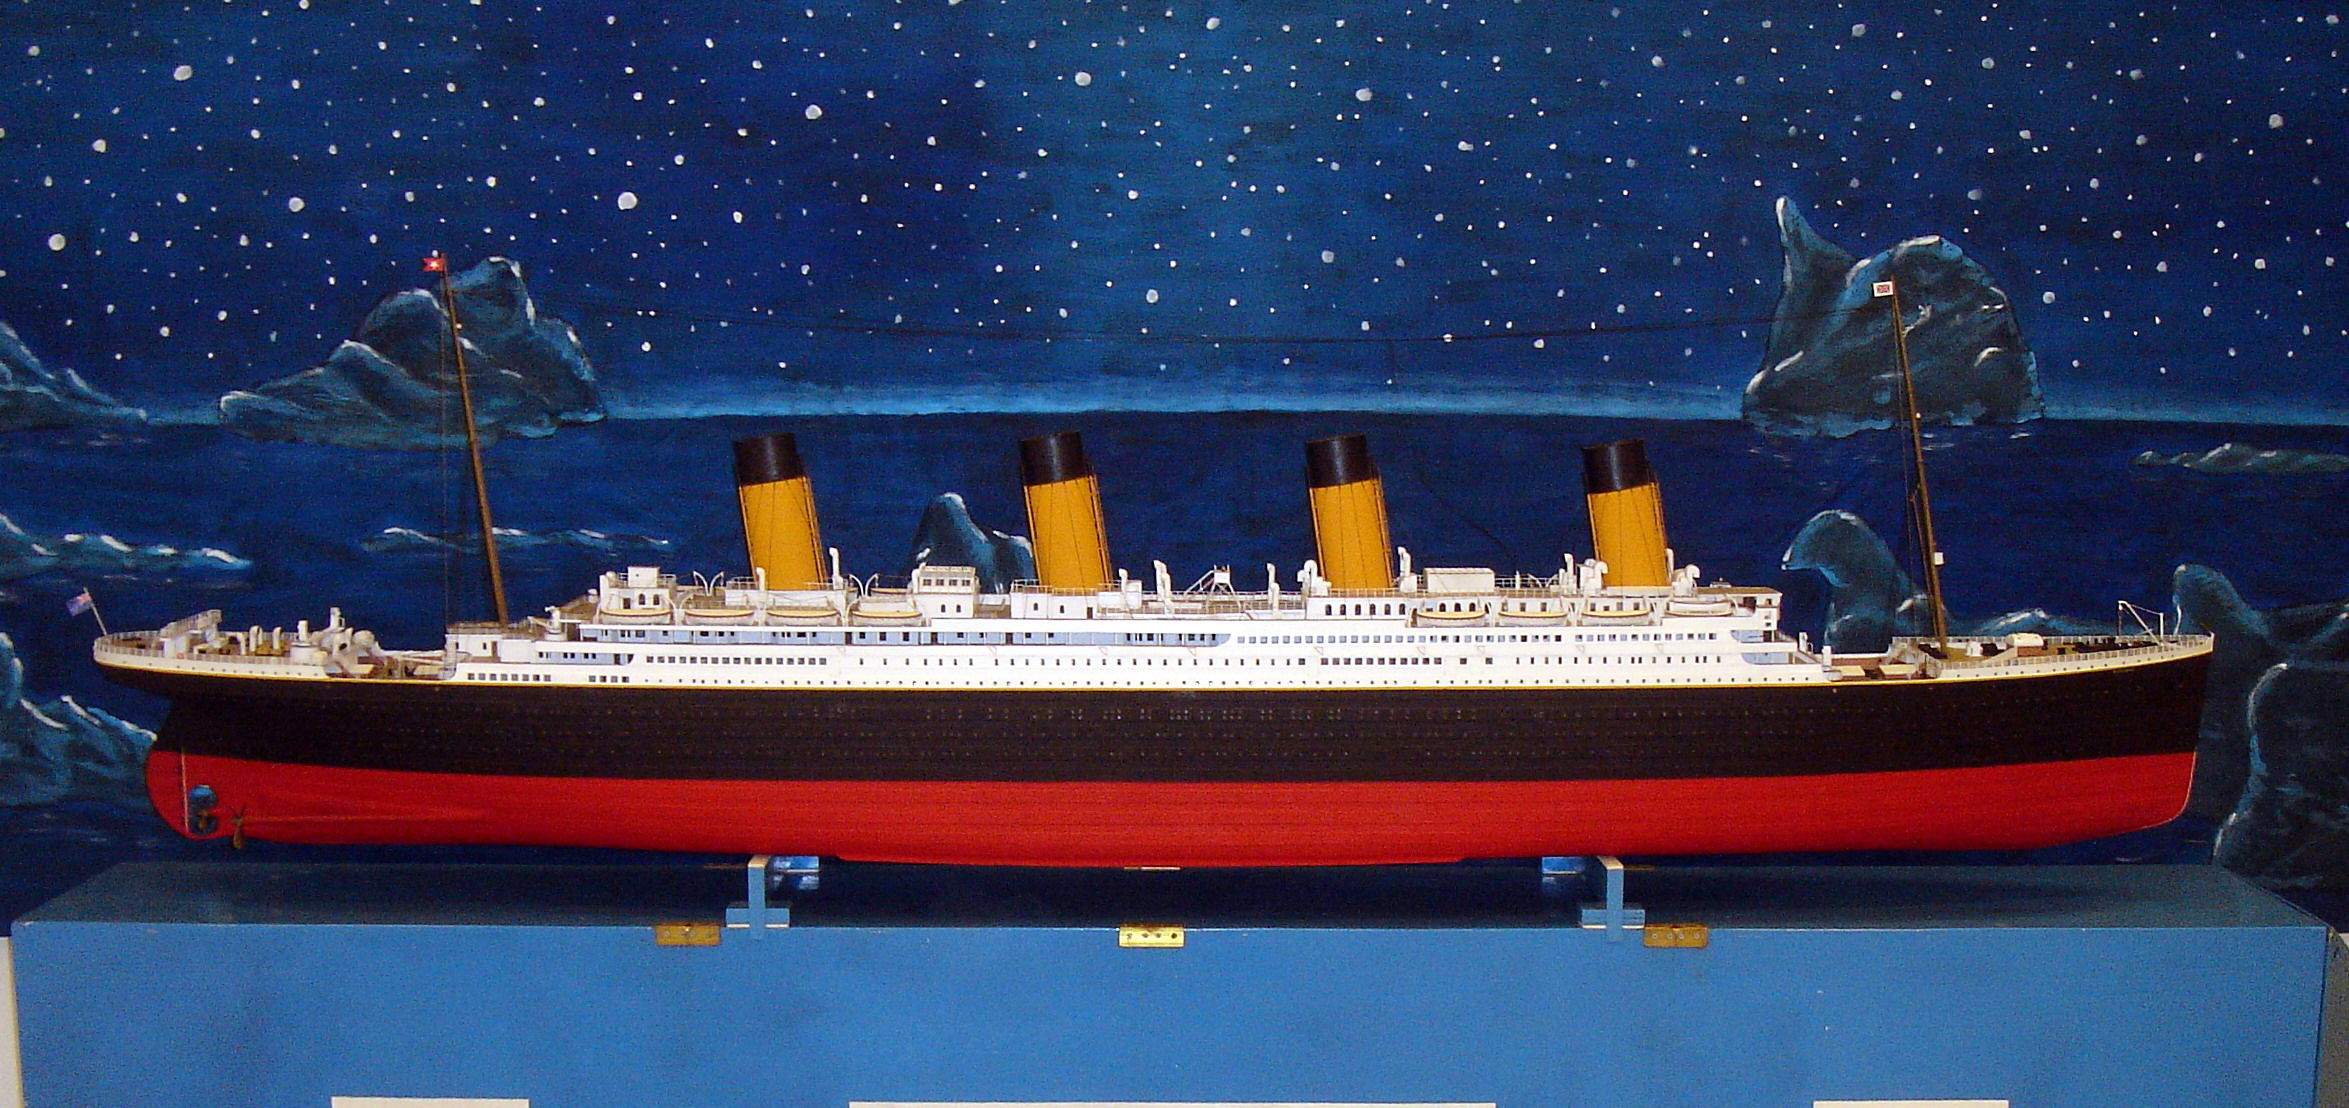

## Introdução

Desde a sua construção, o imponente navio **RMS Titanic** se sobressaiu na sociedade mundial, tendo várias fases de reverberação histórica. 

A primeira quando fora encomendado, a segunda quando derrubado pelo iceberg e a terceira quando encontrada sua estrutura.

Infelizmente com o seu trágico naufrágio foram registradas mais de 1.500 mortes o que levou a uma série de mundanças
nas especificações de construção naval e nas regras de segurança de navegação.

Um fato interessante que levou a algumas medidas foi a questão de um número reduzido de botes salva-vidas, pois os proprietários não queriam comprometer a estética do navio.


O conjunto de dados que vamos apresentar nesta análise de dados pode elucidar alguns outros pontos interessantes.



## Perguntas a serem respondidas

1. Quantidade de Homens e Mulheres?
* Quantidade de sobreviventes e não sobreviventes?
* Quantidade de Pessoas embarcadas em cada Porto?
* Quantidade de pessoas por Classe? (1ª, 2ª e 3ª)
* As crianças tiveram uma maior taxa de sobrevivência?

## Importação de bibliotecas

In [30]:
#Carregar as imagens diretamente no notebook
%matplotlib inline
plt.rcParams['figure.figsize'] = (16,6)

#Processar imagens de alta resolucao
%config InlineBackend.figure_format = 'retina'

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


## Origem dos dados

Os dados fornecidos para análise foram disponibilizados pela **UDACITY** e vão estar disponíveis junto com o projeto em repositório GITHUB público para consulta. 

Cabe salientar que o conteudo dessa amostra de dados (dataset), não comtempla todos os passageiros do TITANIC servindo apenas para o estudo e análise em questão.


In [31]:
#Carregar os dados de analise do TITANIC
df_info = pd.read_csv('titanic-data-6.csv')

#definicoes do Pandas
#pd.set_option('precision', 2)

print("Total de linhas: %d \n\nTotal de colunas: %d \n" % (df_info.shape[0], df_info.shape[1]))

print("Dados iniciais do dataset")

df_info.head()

Total de linhas: 891 

Total de colunas: 12 

Dados iniciais do dataset


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [32]:
print("Dados finais do dataset")

df_info.tail()

Dados finais do dataset


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


### Descartando colunas que não vão ser utilizadas em nossa análise

As seguintes colunas serão descartadas de nossa análise:

+ PassengerId
+ Ticket
+ cabin

Desta forma estaremos facilitando o entendimento dos resultados:


In [33]:
#Descartando as colunas que não utilizadas. Melhorando o entendimento
df_info.drop(['PassengerId', 'Ticket', 'Cabin'], axis=1, inplace=True)

df_info.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


### Renomear Colunas

Agora vamos renomear as colunas e em seguida criamos o dicionário de dados para iniciar a análise dos dados.


In [34]:
df_info.columns = ['Sobrevivente', 'Classe', 'Nome', 'Sexo', 'Idade', 'Conjuges & Irmãos', 'Pais & Filhos', 'Valor', 'Embarque']

df_info.head(10)


,Sobrevivente,Classe,Nome,Sexo,Idade,Conjuges & Irmãos,Pais & Filhos,Valor,Embarque
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S
5,0,3,"Moran, Mr. James",male,NaN,0,0,8.4583,Q
6,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,51.8625,S
7,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,21.0750,S
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,11.1333,S
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,30.0708,C


### Listagem das colunas do nosso conjunto de dados

In [35]:
for i, v in enumerate(df_info.columns):
    print(i, v)

0 Sobrevivente
1 Classe
2 Nome
3 Sexo
4 Idade
5 Conjuges & Irmãos
6 Pais & Filhos
7 Valor
8 Embarque


### Dicionário de Dados:

Agora com as colunas renomeadas vamos detalhar seu Atributo e Descrição: 

**Sobrevivente** : Passageiro é um sobrevivente?
+ 0 = Não 
+ 1 = Sim

**Classe** : Tipo da classe
+ 1 = Primeira 
+ 2 = Segunda
+ 3 = Terceira

**Nome** : Nome do passageiro 

**Sexo** : Sexo do passageiro
+ 0 = Feminino 
+ 1 = Marculino

**Idade** : Idade do passageiro em anos

**Cônjuge & Irmãos** : Quantidade de cônjuges e irmãos de cada passageiro

**Pais & Crianças** : Quantidade de pais e crianças de cada passageiro

**Valor** : Valor pago pela passagem

**Embarque** : Local de embarque (porto)
+ C = Cherbourg
+ Q = Queenstown
+ S = Southampton


### Verificando os tipos de dados utilizados pelo Python:

In [36]:
#Verificando os tipos de dados utilizados pelo Python

df_info.dtypes

Sobrevivente           int64
Classe                 int64
Nome                  object
Sexo                  object
Idade                float64
Conjuges & Irmãos      int64
Pais & Filhos          int64
Valor                float64
Embarque              object
dtype: object

### TRANSFORMAÇÃO DE DADOS

Algumas colunas vão sofrer uma transformação de dados para que os resultados fiquem mais legíveis.


###### Valores Nulos
Identificamos na coluna **"Idade"** a ocorrência de valores Nulos, logo precisamos fazer uma transformação de dados substituindo o valor **NaN** para o valor **0 (zero)**, para isso vamos utilizar a função **nan_to_num** da biblioteca **numpy**.

Desta forma os resultados de cálculos não vão sofrer nenhuma interferência ao longo de nossa análise.

In [37]:
#Transformacao dos dados

#Transformacao dos dados

df_info['Sobrevivente'] = df_info['Sobrevivente'].replace([0, 1],['Não', 'Sim'])
df_info['Classe'] = df_info['Classe'].replace([1,2,3],['Primeira', 'Segunda', 'Terceira'])

#Limpeza de nulos
df_info['Idade'] = np.nan_to_num(df_info['Idade'])

df_info['Sexo'] = df_info['Sexo'].replace(['female','male'],['Feminino', 'Masculino'])
df_info['Embarque'] = df_info['Embarque'].replace(['C', 'Q', 'S'],['Cherbourg', 'Queenstown', 'Southampton'])

df_info.head(10)


,Sobrevivente,Classe,Nome,Sexo,Idade,Conjuges & Irmãos,Pais & Filhos,Valor,Embarque
0,Não,Terceira,"Braund, Mr. Owen Harris",Masculino,22.0,1,0,7.2500,Southampton
1,Sim,Primeira,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Feminino,38.0,1,0,71.2833,Cherbourg
2,Sim,Terceira,"Heikkinen, Miss. Laina",Feminino,26.0,0,0,7.9250,Southampton
3,Sim,Primeira,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Feminino,35.0,1,0,53.1000,Southampton
4,Não,Terceira,"Allen, Mr. William Henry",Masculino,35.0,0,0,8.0500,Southampton
5,Não,Terceira,"Moran, Mr. James",Masculino,0.0,0,0,8.4583,Queenstown
6,Não,Primeira,"McCarthy, Mr. Timothy J",Masculino,54.0,0,0,51.8625,Southampton
7,Não,Terceira,"Palsson, Master. Gosta Leonard",Masculino,2.0,3,1,21.0750,Southampton
8,Sim,Terceira,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",Feminino,27.0,0,2,11.1333,Southampton
9,Sim,Segunda,"Nasser, Mrs. Nicholas (Adele Achem)",Feminino,14.0,1,0,30.0708,Cherbourg


### Fazendo uma rápida verificação do total de informações por coluna

In [38]:
#Total de informação por coluna

df_info.count()

Sobrevivente         891
Classe               891
Nome                 891
Sexo                 891
Idade                891
Conjuges & Irmãos    891
Pais & Filhos        891
Valor                891
Embarque             889
dtype: int64

**Observação:** O total de Embarque está menor porque existem 2 registros vazios.

### Utilizando o recurso describe para uma estátisica rápida das colunas numéricas

In [39]:
# Retorna estatísticas descritivas úteis para cada coluna numerica
df_info.describe()

,Idade,Conjuges & Irmãos,Pais & Filhos,Valor
count,891.000000,891.000000,891.000000,891.000000
mean,23.799293,0.523008,0.381594,32.204208
std,17.596074,1.102743,0.806057,49.693429
min,0.000000,0.000000,0.000000,0.000000
25%,6.000000,0.000000,0.000000,7.910400
50%,24.000000,0.000000,0.000000,14.454200
75%,35.000000,1.000000,0.000000,31.000000
max,80.000000,8.000000,6.000000,512.329200


## RESPONDENDO AOS QUESTIONAMENTOS

### 1- Quantidade de Homens e Mulheres?

In [40]:
#Preparacao dos dados e Apresentacao do Grafico em resposta a pergunta

homem = df_info['Sexo'].value_counts()['Masculino']
mulher = df_info['Sexo'].value_counts()['Feminino']

print('Quantidade de Homens: %d' % homem)
print('Quantidade de Mulheres: %d\n' % mulher)


Quantidade de Homens: 577
Quantidade de Mulheres: 314



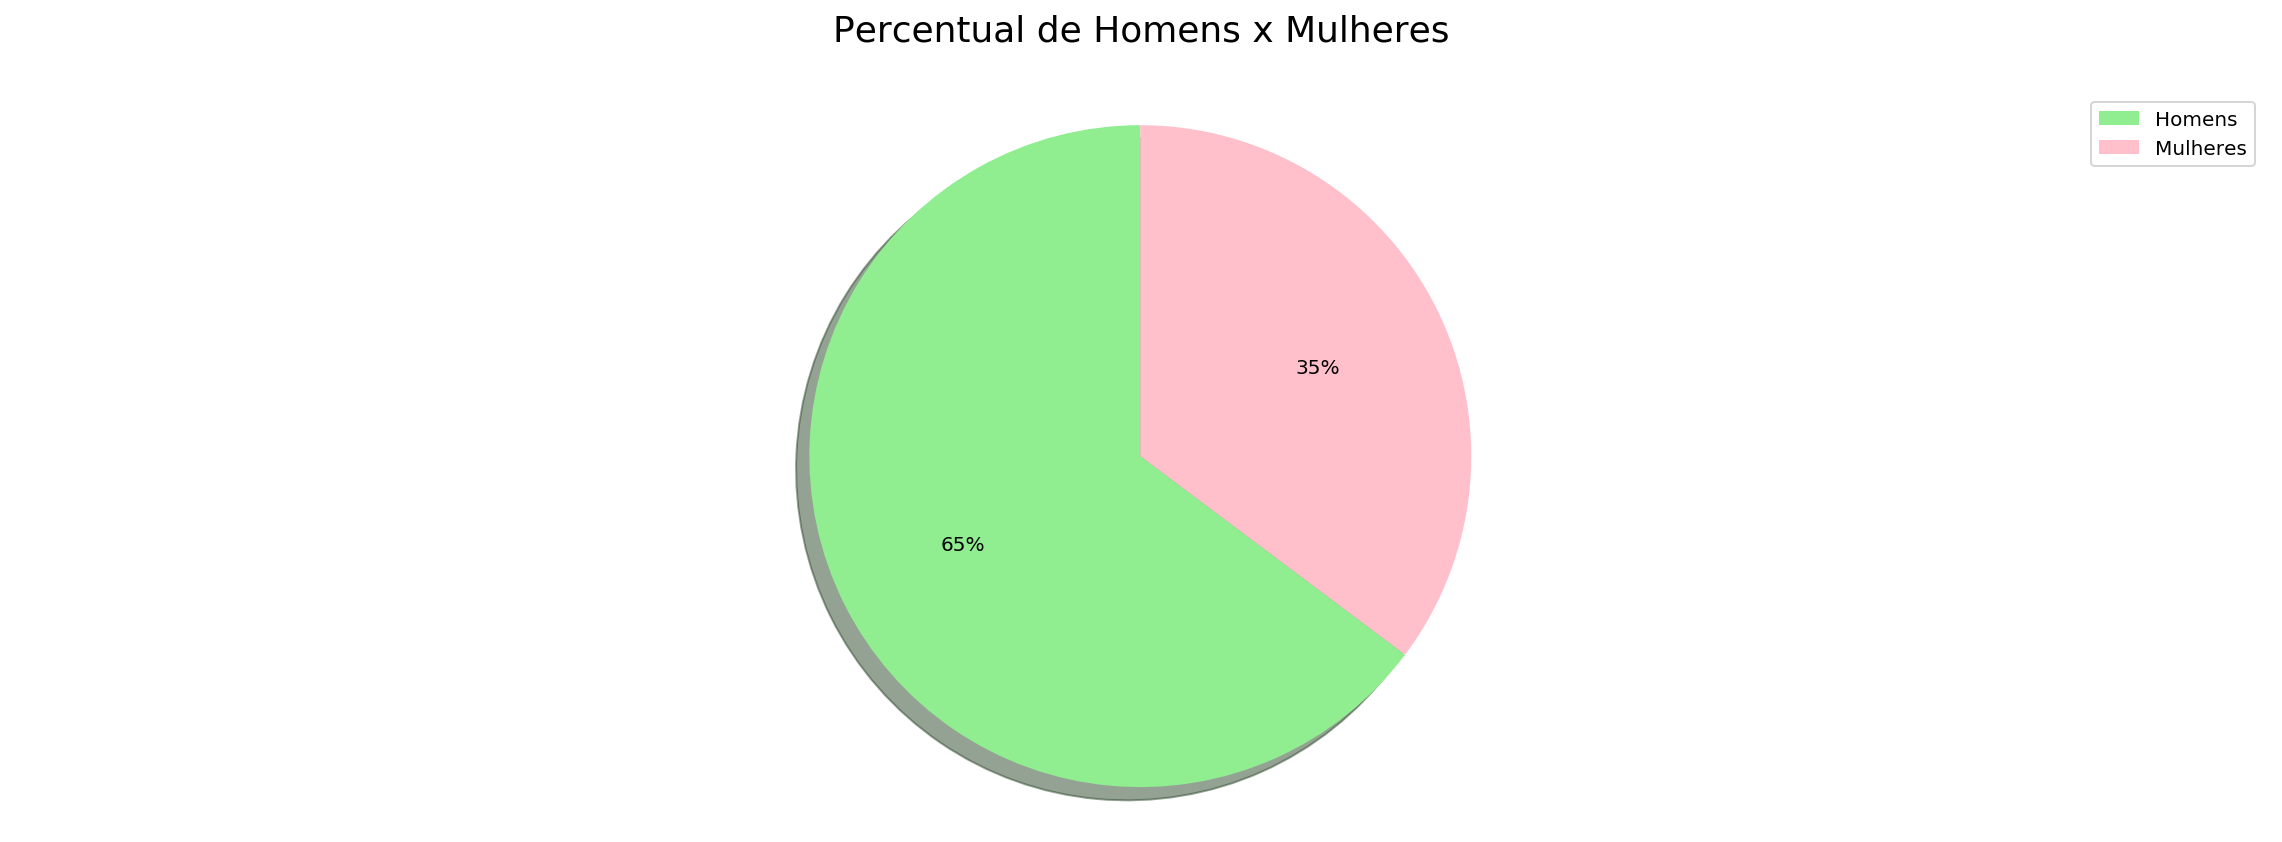

In [41]:
#Geracao do Grafico
labels = ['Homens', 'Mulheres']
sizes = [homem, mulher]
colors = ['lightgreen', 'pink']
plt.pie(sizes, colors=colors, shadow=True, startangle=90, autopct='%1.0f%%')
plt.title('Percentual de Homens x Mulheres\n', fontsize=18) #adicionando o título
plt.legend(labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.show()

### 2- Total de sobreviventes e não sobreviventes?

In [42]:
#Preparacao dos dados e Apresentacao do Grafico em resposta a pergunta

c1 = df_info['Sobrevivente'].value_counts()['Sim']
c2 = df_info['Sobrevivente'].value_counts()['Não']

print('Quantidade de Sobreviventes: %d' % c1)
print('Quantidade de Não sobreviventes: %d\n' % c2)


Quantidade de Sobreviventes: 342
Quantidade de Não sobreviventes: 549



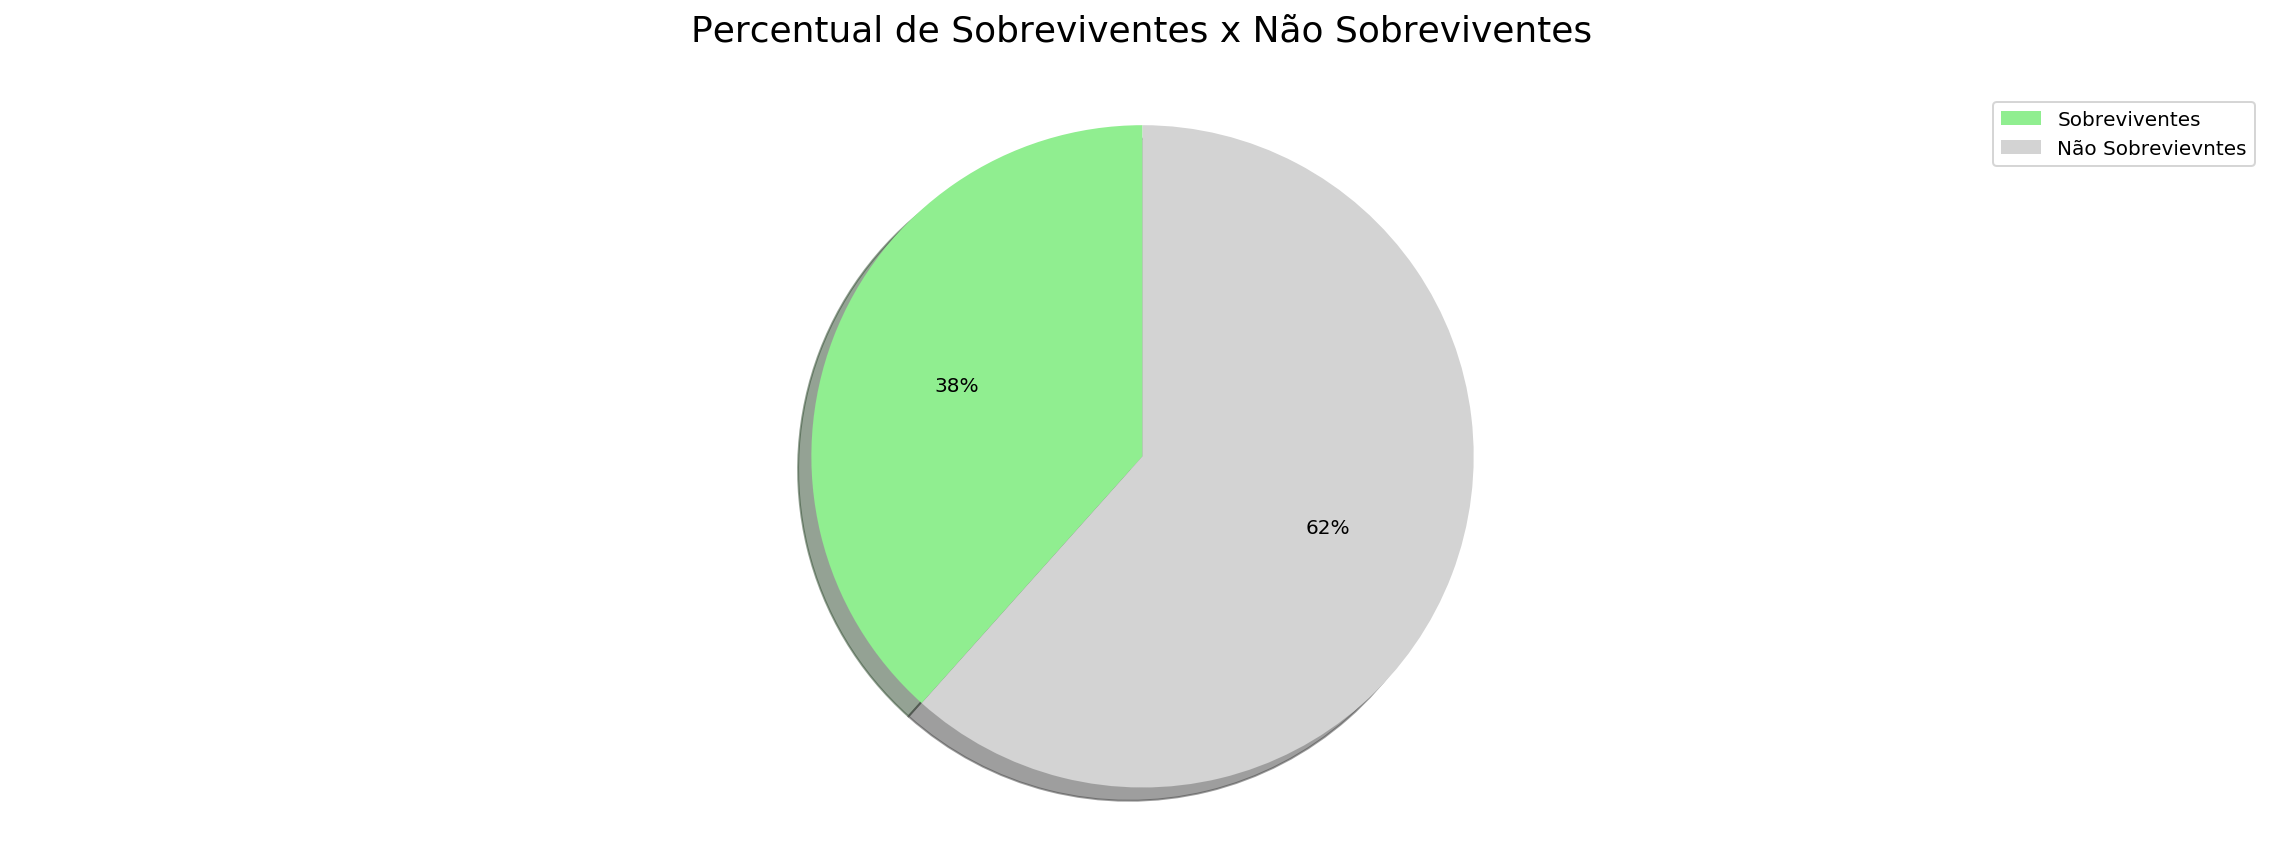

In [43]:
#Preparando o grafico
labels = ['Sobreviventes', 'Não Sobrevievntes']
sizes = [c1, c2]
colors = ['lightgreen', 'lightgray']
plt.pie(sizes, colors=colors, shadow=True, startangle=90, autopct='%1.0f%%')
plt.title('Percentual de Sobreviventes x Não Sobreviventes\n', fontsize=18) #adicionando o título
plt.legend(labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.show()

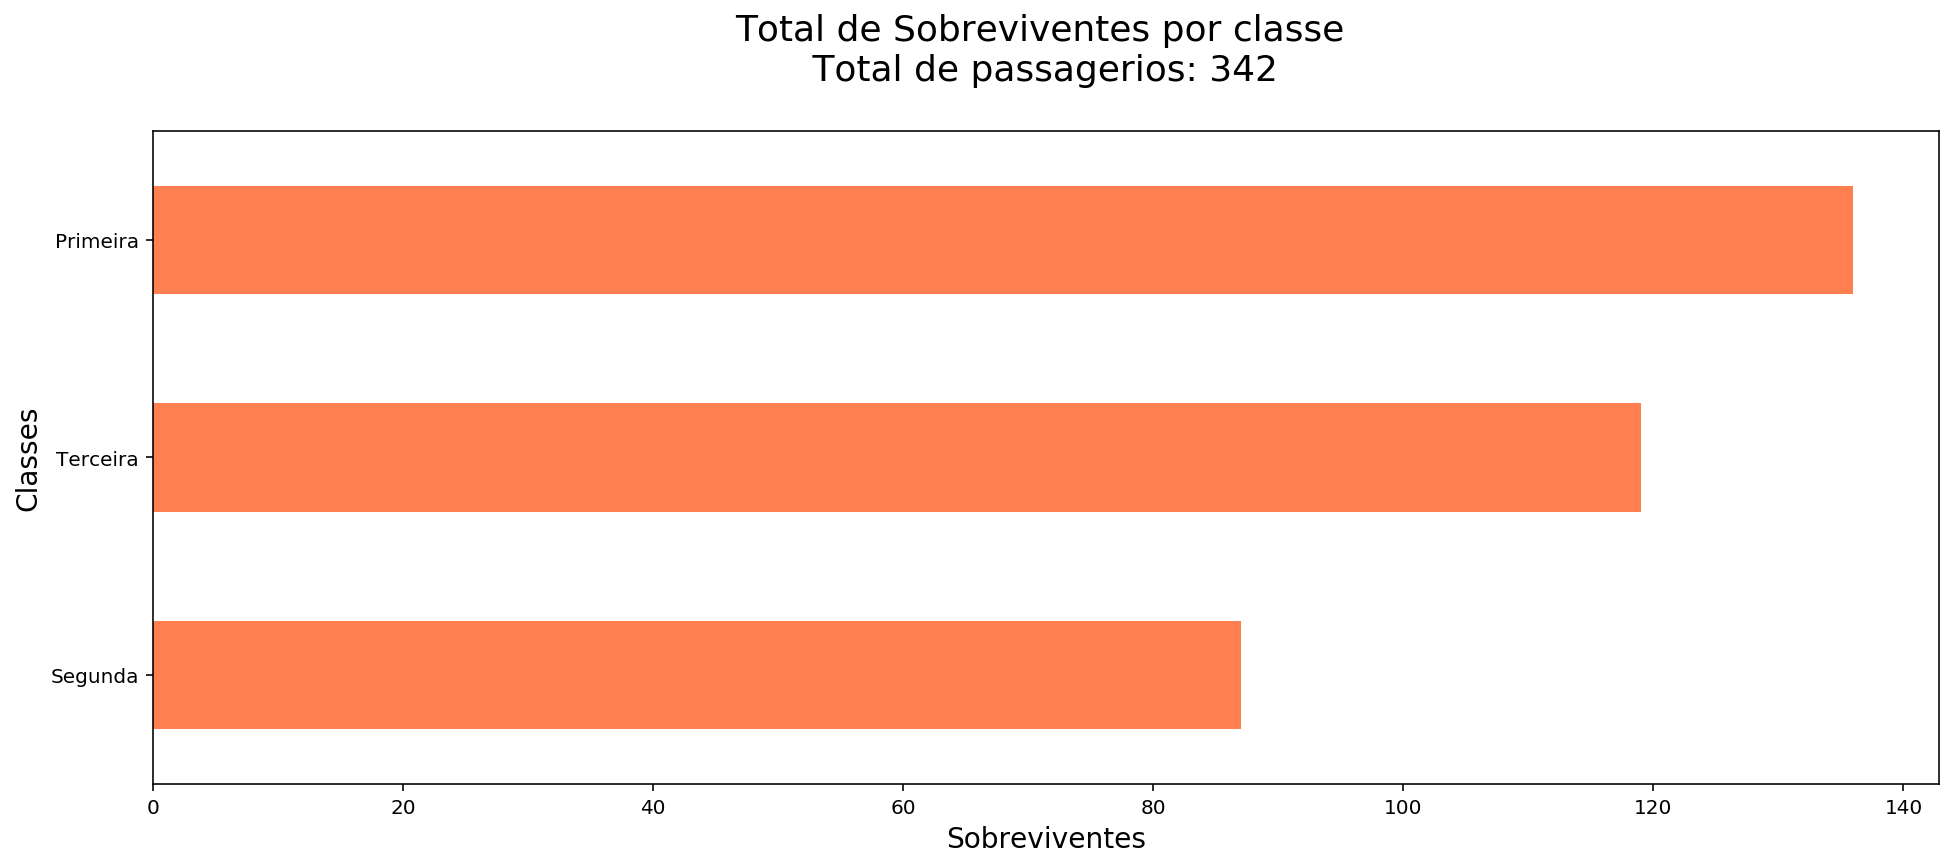

In [44]:
df_sobreviventes = df_info[df_info['Sobrevivente'] == 'Sim']['Classe'].value_counts().sort_values(ascending=True)

df_sobreviventes.plot(kind='barh', label=True, color='coral', rot=0, figsize=(16,6));

plt.title('Total de Sobreviventes por classe \n Total de passagerios: %d \n' % (df_sobreviventes.sum()), fontsize=18)
plt.xlabel('Sobreviventes', fontsize=14)
plt.ylabel('Classes', fontsize=14)
plt.grid=True
plt.show()

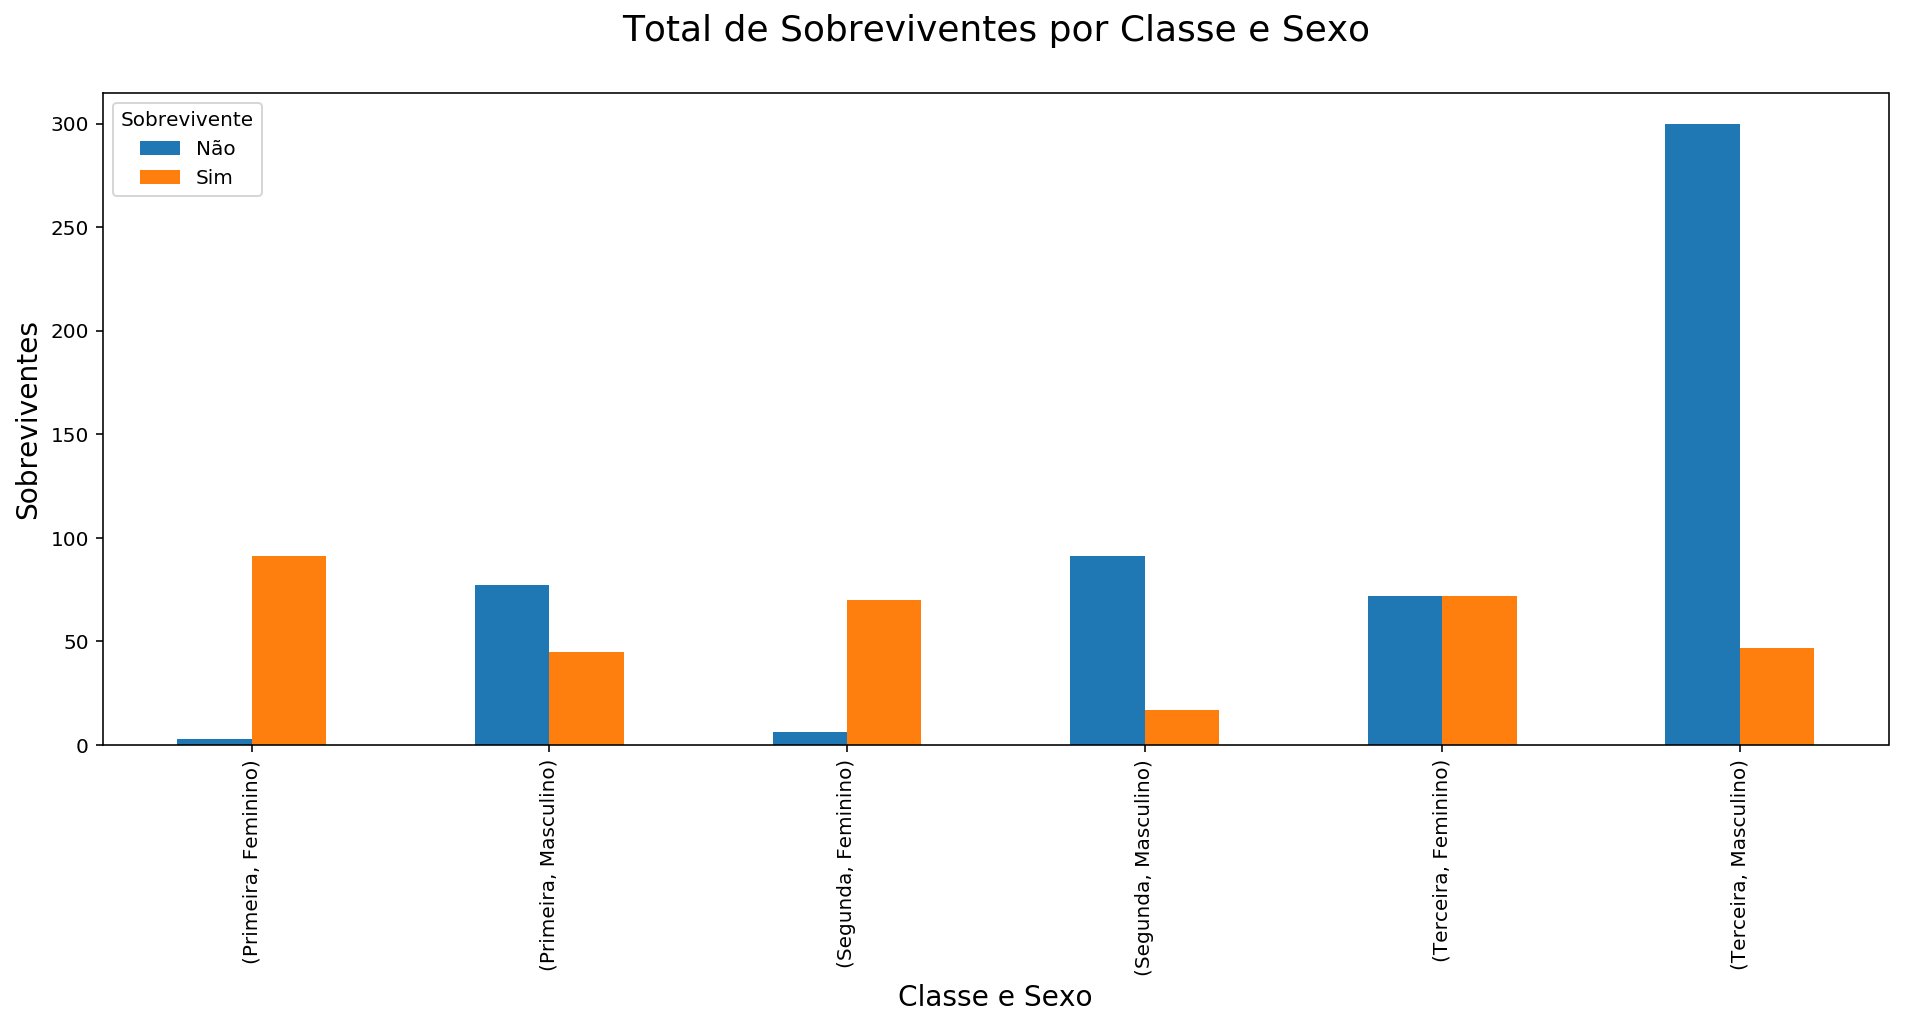

In [45]:
#Sobreviventes por Classe e Sexo
df_info.groupby(['Classe','Sexo', 'Sobrevivente']).size().unstack().plot.bar();

plt.title('Total de Sobreviventes por Classe e Sexo\n', fontsize=18)
plt.xlabel('Classe e Sexo', fontsize=14)
plt.ylabel('Sobreviventes', fontsize=14)
plt.grid=True
plt.show()

In [46]:
df_info.head()

,Sobrevivente,Classe,Nome,Sexo,Idade,Conjuges & Irmãos,Pais & Filhos,Valor,Embarque
0,Não,Terceira,"Braund, Mr. Owen Harris",Masculino,22.0,1,0,7.2500,Southampton
1,Sim,Primeira,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Feminino,38.0,1,0,71.2833,Cherbourg
2,Sim,Terceira,"Heikkinen, Miss. Laina",Feminino,26.0,0,0,7.9250,Southampton
3,Sim,Primeira,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Feminino,35.0,1,0,53.1000,Southampton
4,Não,Terceira,"Allen, Mr. William Henry",Masculino,35.0,0,0,8.0500,Southampton


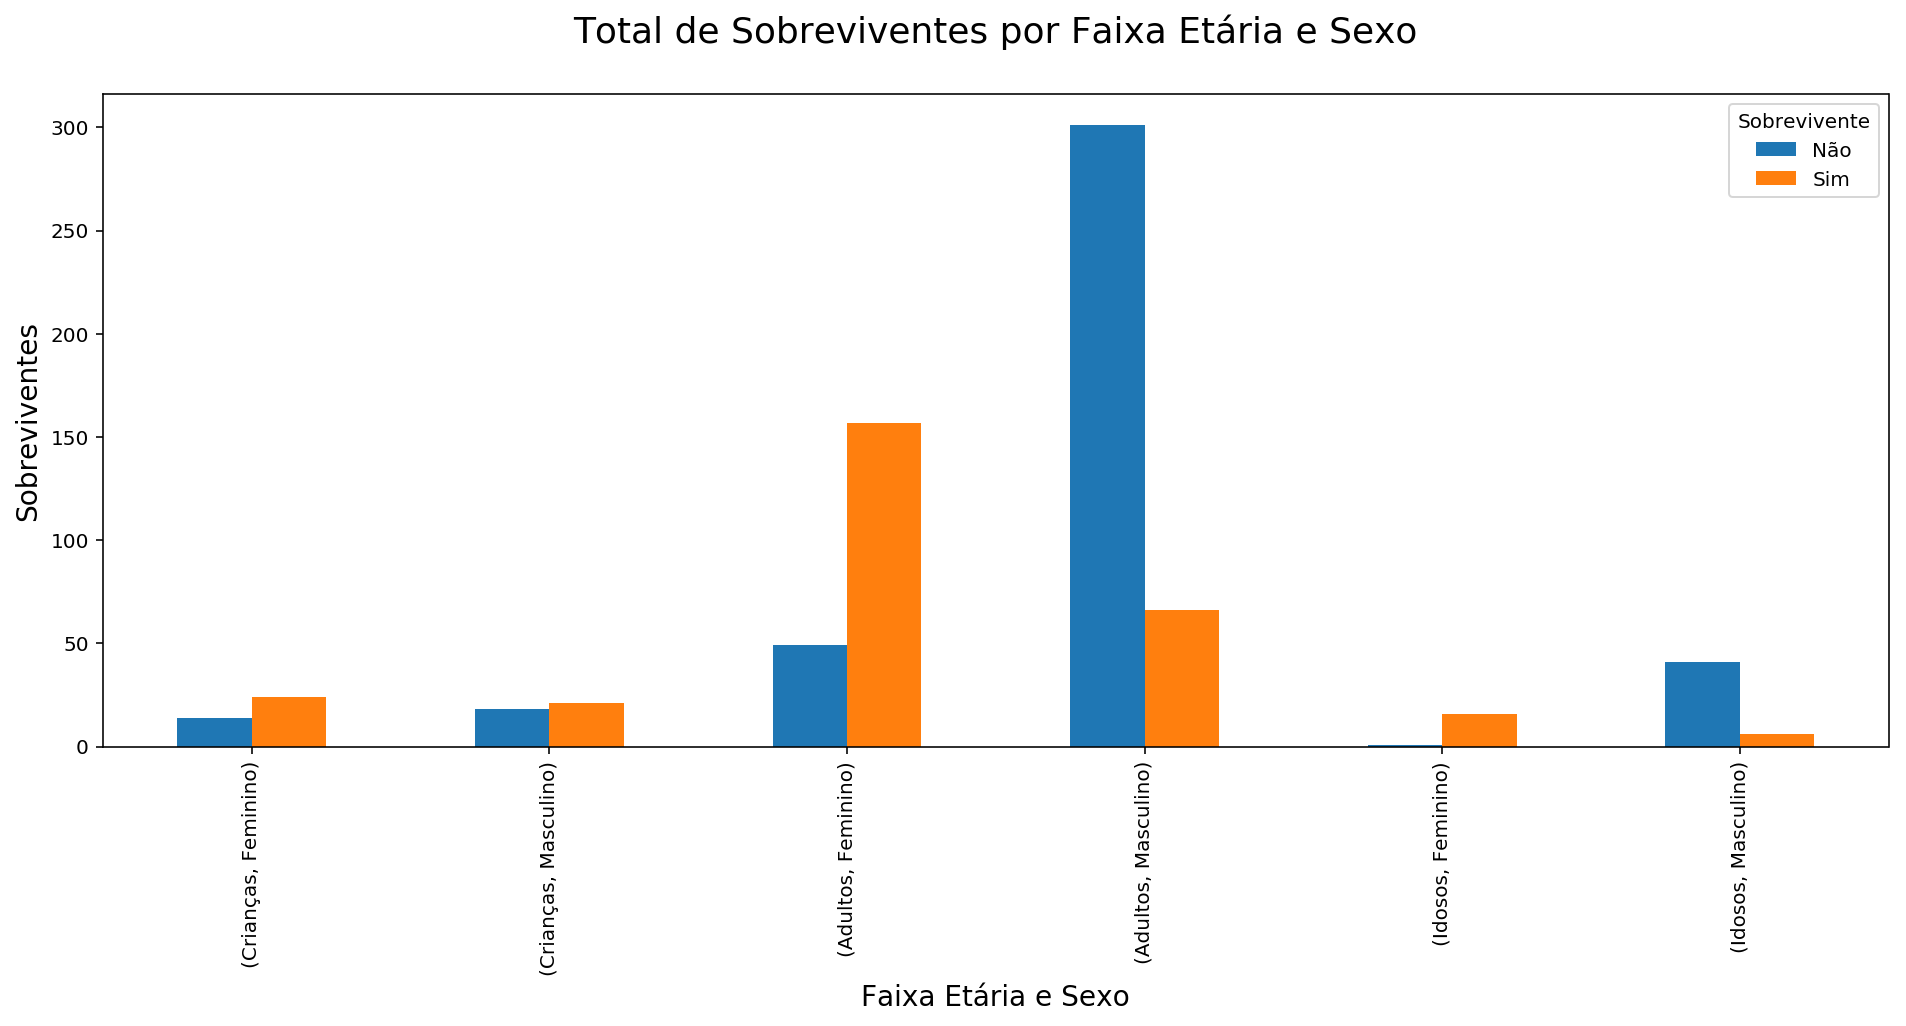

In [47]:
#Criacao de uma nova coluna para ajudar em nossa analise
df_info['faixa_etaria'] = pd.cut(df_info['Idade'], [0, 14, 50, 150], labels=["Crianças", "Adultos", "Idosos"])

df_info.groupby(['faixa_etaria', 'Sexo', 'Sobrevivente']).size().unstack().plot.bar();

plt.title('Total de Sobreviventes por Faixa Etária e Sexo\n', fontsize=18)
plt.xlabel('Faixa Etária e Sexo', fontsize=14)
plt.ylabel('Sobreviventes', fontsize=14)
plt.show()


### 3- Quantidade de Pessoas embarcadas em cada Porto?

In [48]:
#Preparando os dados para geracao do grafico
df_porto = df_info

graf = pd.pivot_table(df_porto, index=['Embarque'], values='Nome', aggfunc='count')

graf.head()

,Nome
Embarque,
Cherbourg,168
Queenstown,77
Southampton,644


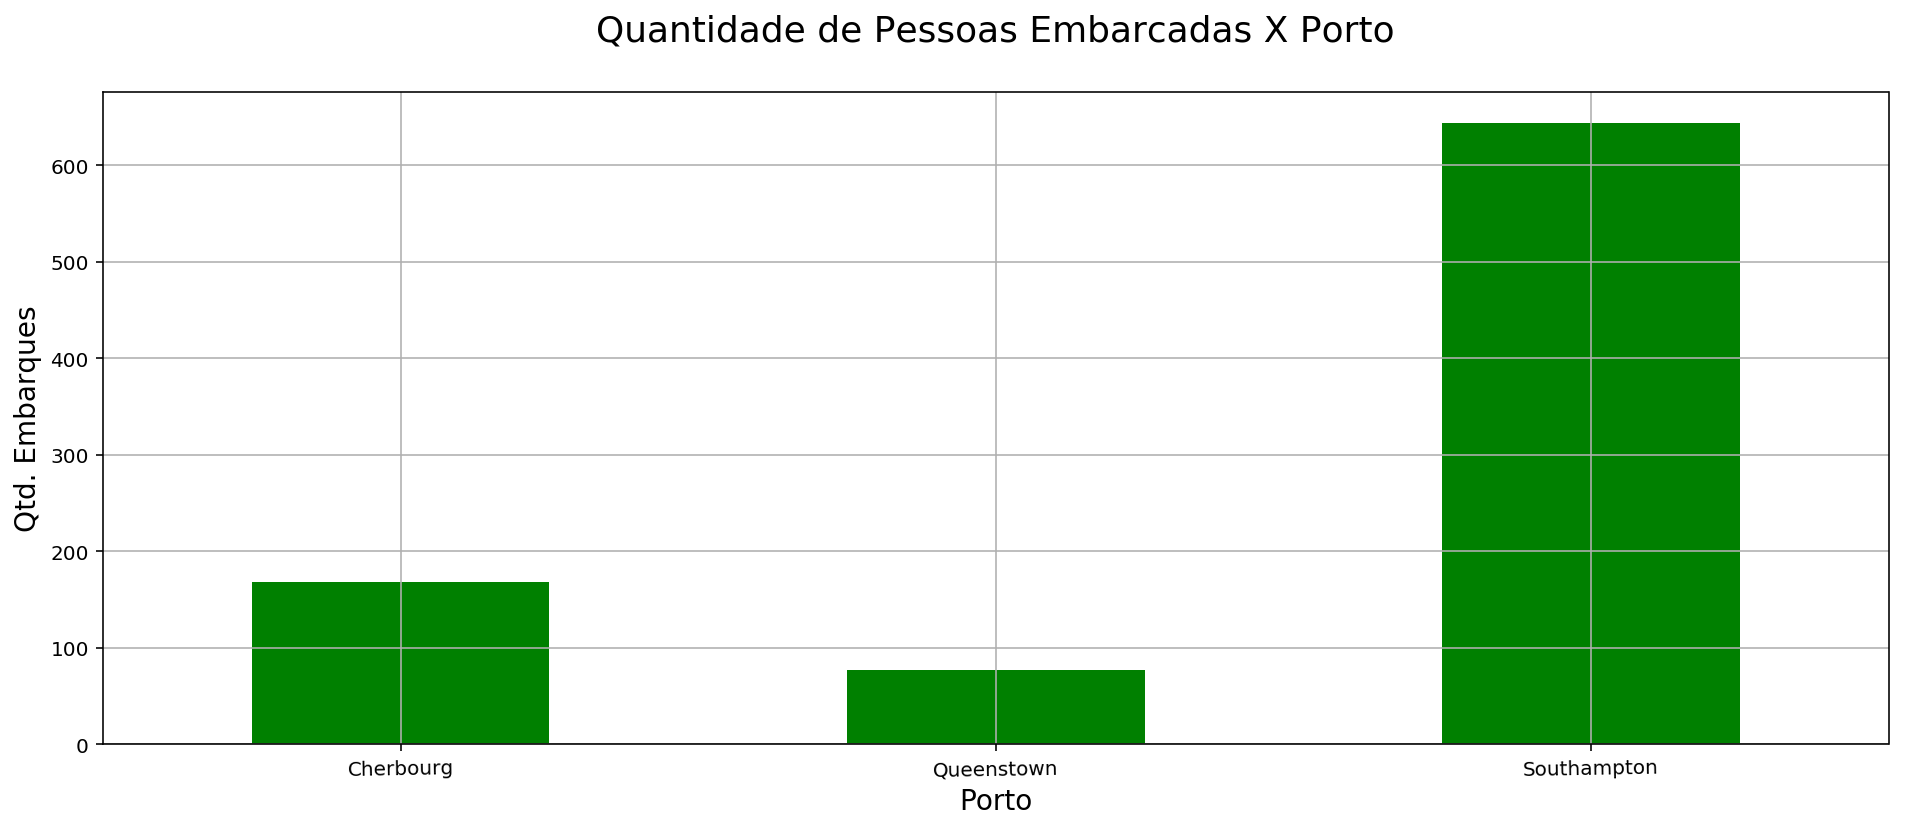

In [49]:
#Apresentacao do Grafico em resposta a pergunta
graf.plot(kind='bar', legend=None, color='green', rot=1, grid=True) #criando gráfico
plt.title('Quantidade de Pessoas Embarcadas X Porto\n', fontsize=18) #adicionando o título
plt.xlabel('Porto', fontsize=14) #definindo nome do eixo X
plt.ylabel('Qtd. Embarques', fontsize=14) #definindo nome do eixo Y
plt.show() #mostrando gráfico

### 4- Quantidade de Pessoas por Classe? (1ª, 2ª e 3ª)

In [50]:
#Preparando os dados para geracao do grafico
df_data = df_info
df_data['Classe'] = df_data['Classe'].replace([1,2,3],['Primeira', 'Segunda', 'Terceira'])

graf = pd.pivot_table(df_data, index=['Classe'], values='Idade', aggfunc='count')

graf.head()

,Idade
Classe,
Primeira,216
Segunda,184
Terceira,491


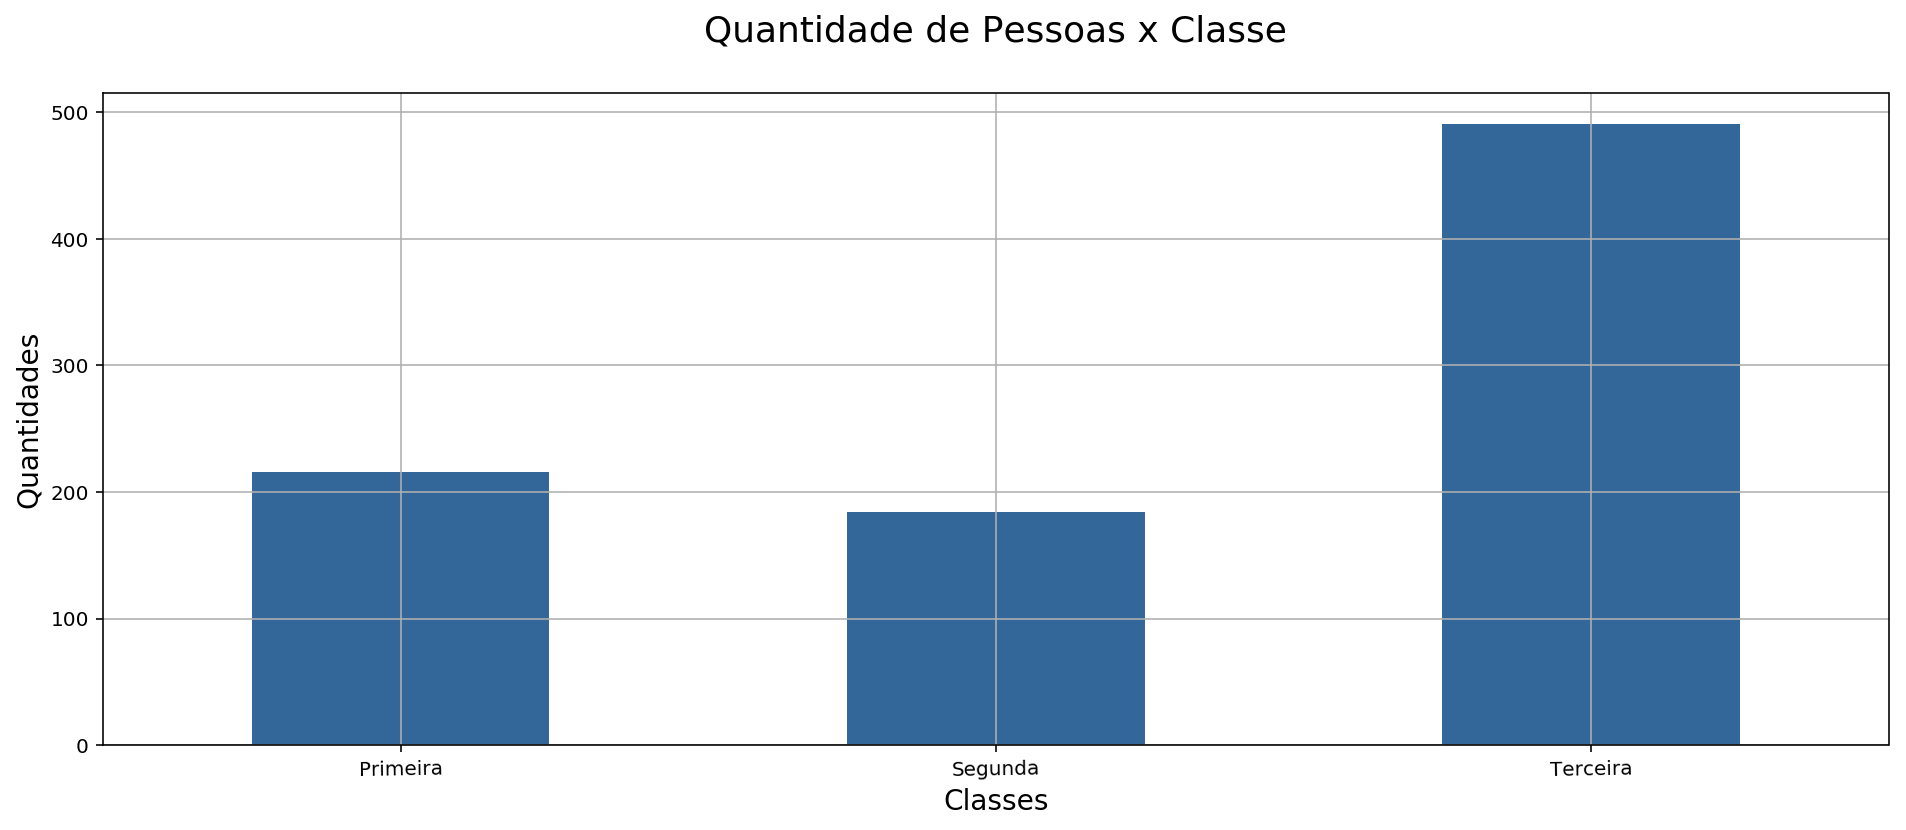

In [51]:
#Apresentacao do Grafico em resposta a pergunta
graf.plot(kind='bar', legend=None, color='#336699', rot=1, grid=True) #criando gráfico
plt.title('Quantidade de Pessoas x Classe\n', fontsize=18) #adicionando o título
plt.xlabel('Classes', fontsize=14) #definindo nome do eixo X
plt.ylabel('Quantidades', fontsize=14) #definindo nome do eixo Y
plt.show() #mostrando gráfico

### As crianças tiveram uma maior taxa de sobrevivência?

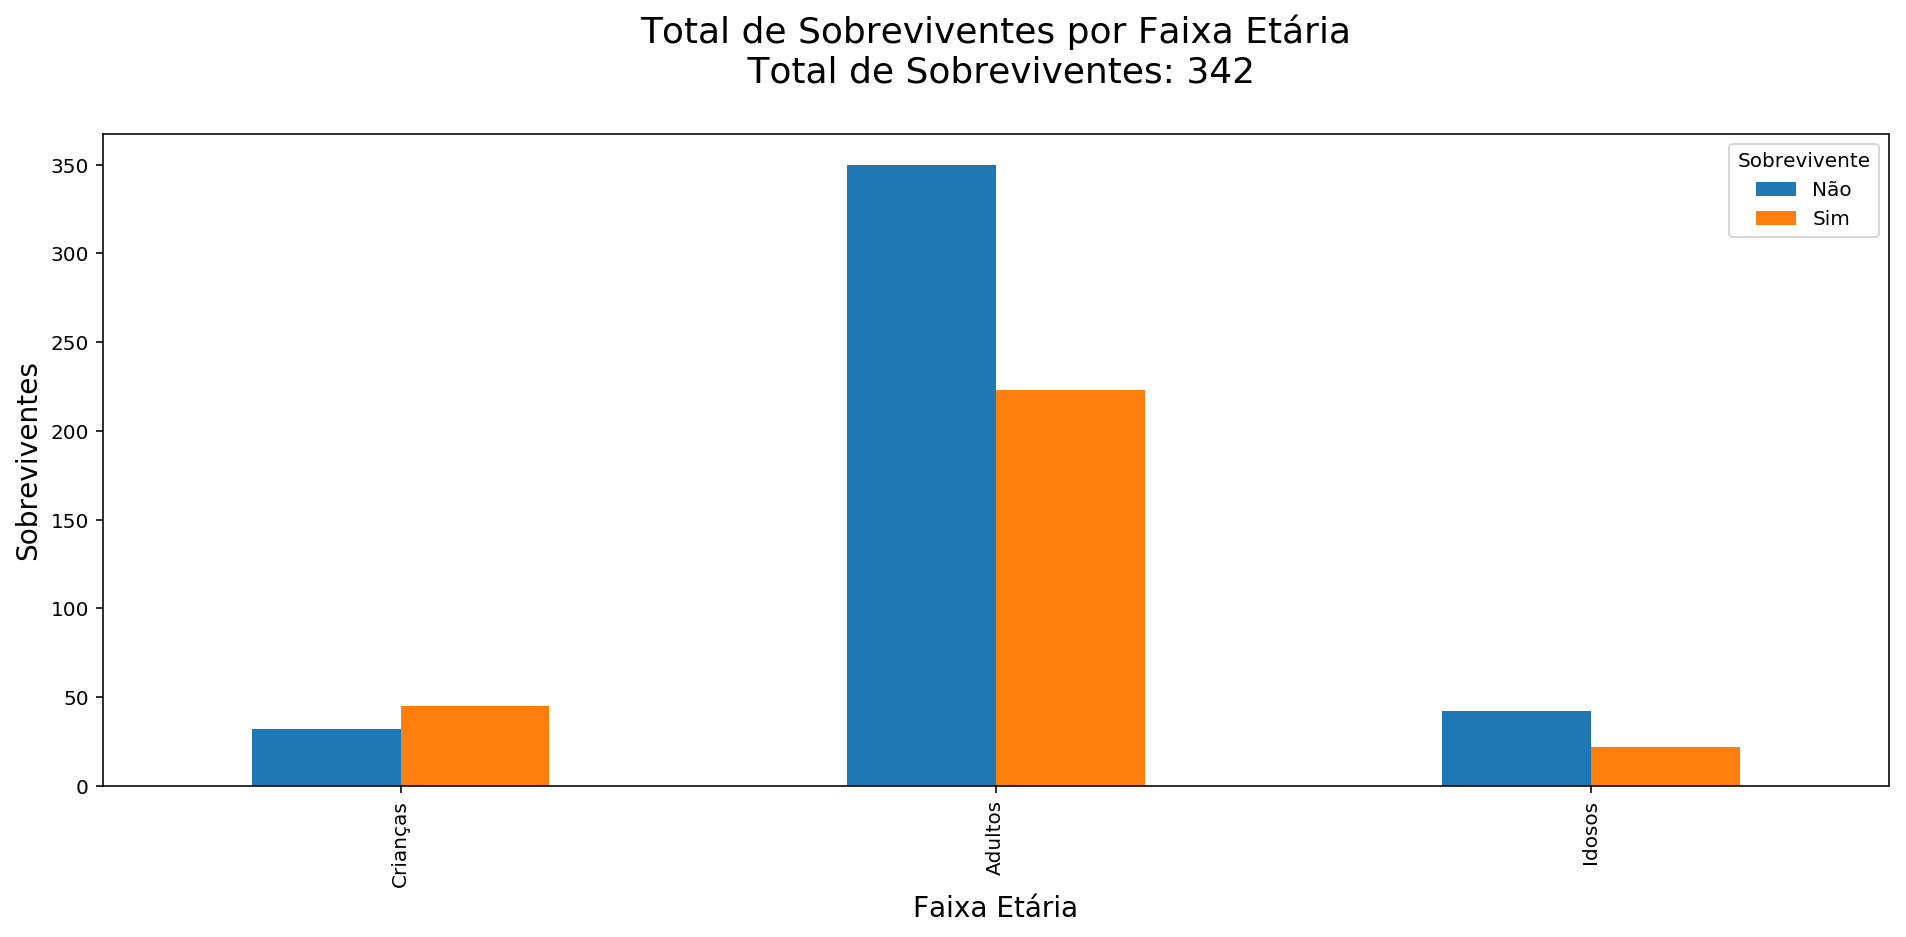

In [52]:
#Geracao do Gráfico de Barras
df_info.groupby(['faixa_etaria', 'Sobrevivente']).size().unstack().plot.bar();

plt.title('Total de Sobreviventes por Faixa Etária\n Total de Sobreviventes: %d\n' % (df_sobreviventes.sum()), fontsize=18)
plt.xlabel('Faixa Etária', fontsize=14)
plt.ylabel('Sobreviventes', fontsize=14)
plt.show()


### Distibuição por Idade

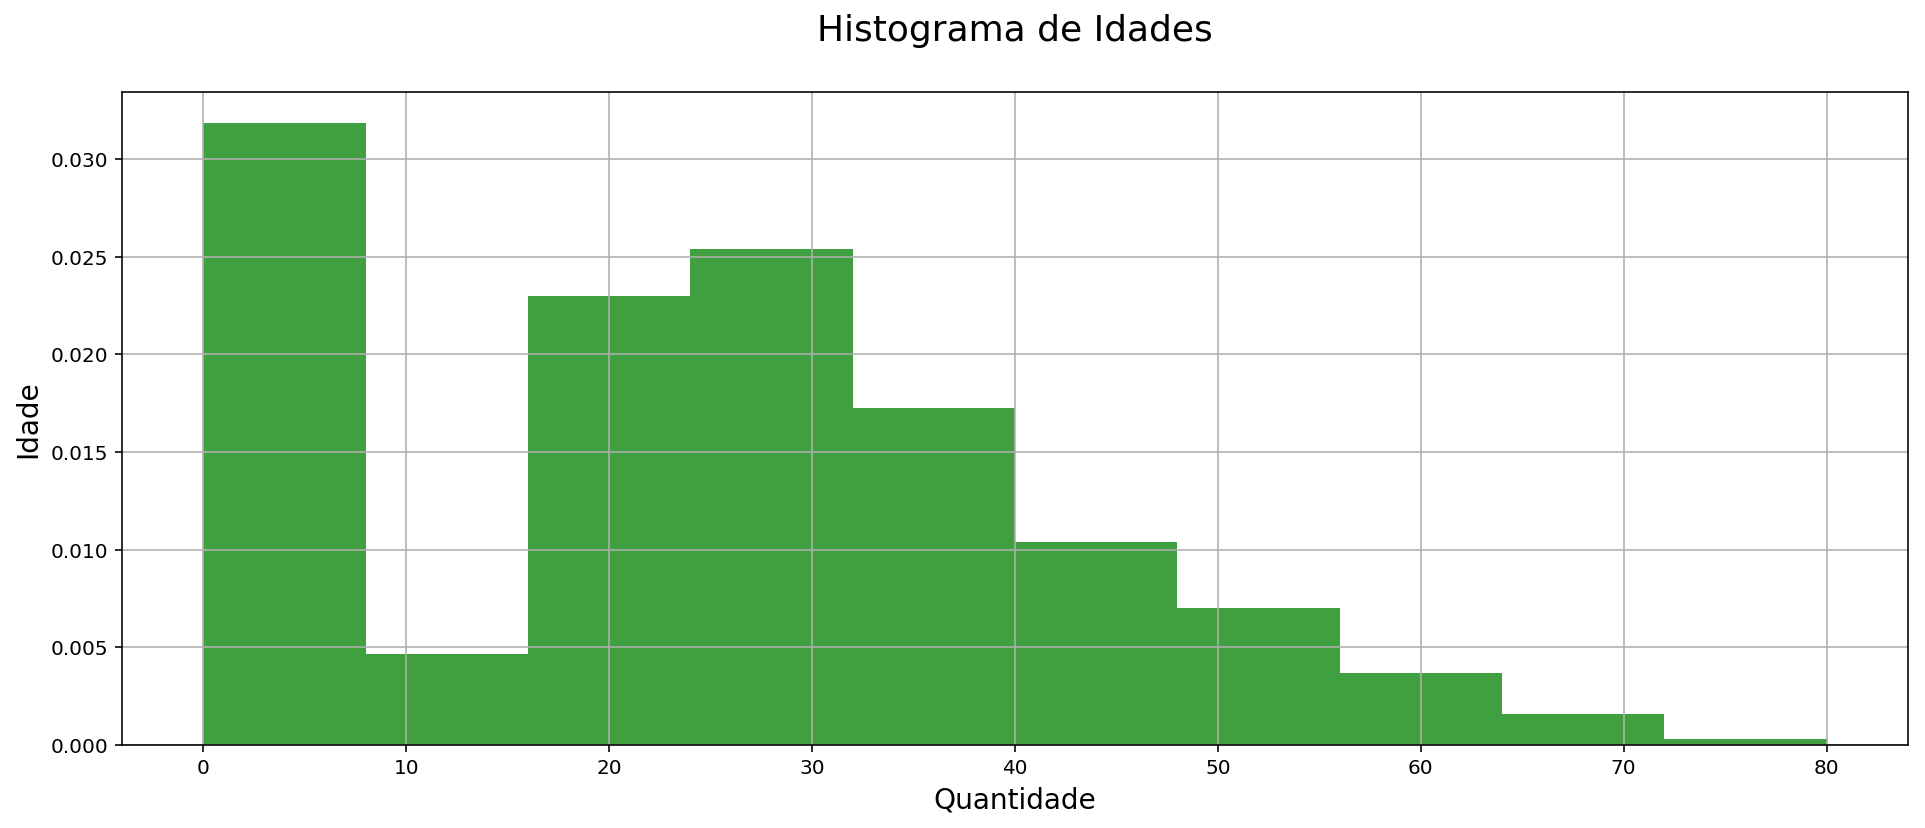

In [53]:
#Apresentacao do Grafico em resposta a pergunta
df_info['Idade'].hist(density=1, facecolor='g', alpha=0.75)
plt.xlabel('Quantidade', fontsize=14)
plt.ylabel('Idade', fontsize=14)
plt.title('Histograma de Idades\n', fontsize=18)
plt.grid=(True)
plt.show()

### CONCLUSÃO

Com este estudo podemos cehgar as seguintes conclusões em respostas as perguntas iniciais:

**1- Quantidade de Homens e Mulheres?**

Concluímos que existia um percentual maior de Homens e por isso percebemos que existu um número maior de sobrevientes do sexo masculino observados ao longo do estudo.      

**2- Quantidade de sobreviventes e não sobreviventes?**

Observamos que tivemos um número e percentual superior de Não sobreviventes. O maior número de sobreviventes foi de mulheres o que corrobora com o Código de Conduta (Mulheres e Crianças primeiro) 

**3- Quantidade de Pessoas embarcadas em cada Porto?**

Conseguimos observar distribuição de Pessoas que embarcaram em cada porto.


**4- Quantidade de pessoas por Classe? (1ª, 2ª e 3ª)**

Observamos a quantidade de pessoas que embarncaram por classe

**5- As crianças tiveram uma maior taxa de sobrevivência?**

Observamos que as crianças não tiveram um número relevante de sobreviência mesmo com o Código de conduta onde Mulheres e Crianças tem a prioridade.



###### Considerações Finais

Está análise exploratória teve o intuito de apresentar alguns dados e geração de gráficos para conhecimento
da amostra de dados utilizada.


Sabe-se que o número de passageiros e tripulantes é bem superior ao que utilizamos em nosso estudo, tendo seu valor total aproximado em 2.200 pessoas. Nosso estudo levou em consideração apenas 891 registros o que não torna os resultados conclusivos em um analise completo do trágico evento TItanic.

Também aproveitamos reafirmar, pois existe o item de **Transformação de Dados** em nosso relátorio, que os dados possuem algumas falhas, contendo **valores nulos** e **sofreram correções para não distorcer os cálculos e atrapalhar os nossos estudos.**

Cabe salientar que é um estudo inicial e pode ter sua evolução ao longo do tempo.

Em tempo ressalto que não foram utilizados modelos estátisticos sendo que os resultados apurados foram determinados apenas pela amostra de dados fornecida utilizando estatísticas descritivas e de visualização.


### FONTES/BIBLIOGRAFIA

RMS Titanic 
https://pt.wikipedia.org/wiki/RMS_Titanic

Mulheres e crianças primeiro (Código de Conduta)
https://pt.wikipedia.org/wiki/Mulheres_e_crian%C3%A7as_primeiro

Kaggle
https://www.kaggle.com/c/titanic

Python Data Analysis Library
https://pandas.pydata.org/pandas-docs/stable/

Python Tutorials - Matplotlib
https://pythonspot.com/matplotlib/

Matplotlib - Python Plotting
https://matplotlib.org/index.html

Stackoverflow
https://stackoverflow.com/